In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import metrics

In [2]:
data_frame = pd.read_csv("./agaricus-lepiota.data")

x, y = pd.get_dummies(data_frame.iloc[:, 1:]), data_frame['edibility']

In [3]:
# db = DBSCAN(eps=0.5,min_samples=10).fit(x_new)

# n_clusters_ = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
# print(n_clusters_)

In [4]:
kmeans_model = KMeans(n_clusters=7).fit(x)
labels = kmeans_model.labels_
metrics.silhouette_score(x, labels, metric='euclidean')

0.28307665897016704

In [5]:
scores = []
steps = []
for i in range(2, 30):
	kmeans_model = KMeans(n_clusters=i).fit(x)
	labels = kmeans_model.labels_
	scores.append(metrics.silhouette_score(x, labels, metric='euclidean'))
	steps.append(i)

9


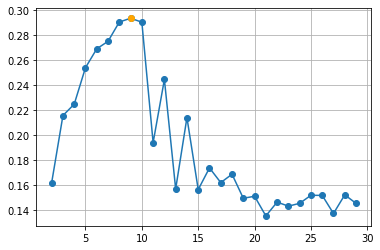

In [6]:
np.array(scores)
argmax = np.argmax(scores)
plt.plot(steps, scores, marker='o')
plt.plot(steps[argmax], scores[argmax], marker='o', c='orange')
plt.grid()
print(argmax + 2)

In [7]:
pca_scores = []
pca = PCA(n_components=len(x.columns))
pca.fit(x)
for i in range(len(x.columns)-1):
	pca_scores.append(sum(pca.explained_variance_[0:i]))
	

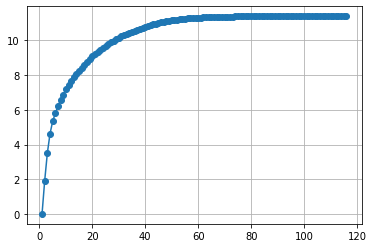

In [8]:
plt.plot(np.arange(1,len(x.columns)), pca_scores, marker='o')
plt.grid()

In [9]:
pca = PCA(n_components=20)
x_new = pca.fit_transform(x)

In [10]:
labels = KMeans(n_clusters=9).fit_predict(x_new)

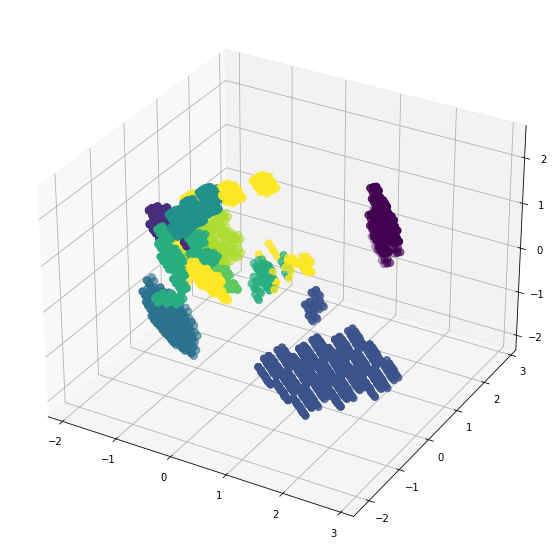

In [16]:
pca = PCA(n_components=3)
x_plot = np.array(pca.fit_transform(x))
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_plot[:,0], x_plot[:,1], x_plot[:,2], c=labels, s=50, cmap='viridis')